__Planes__

We've learnt how to make galaxy objects out of light and mass profiles. Now, we'll use these galaxies to make a strong-gravitational lens. 
 
For newcomers to lensing, a strong gravitation lens is a system where two (or more) galaxies align perfectly down our line of sight, such that the foreground galaxy's mass (represented as mass profiles) deflects the light  (represented as light profiles) of the background source galaxy(s).

When the alignment is just right and the lens is just massive enough, the background source galaxy appears multiple times. The schematic in the cell below shows a crude drawing of such a system, where two light-rays from the source are bending around the lens galaxy and into the observer (light should bend 'smoothly', but drawing this on a keyboard wasn't possible - so just pretend the diagonal lines coming from the observer and source are less jagged):

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its light after it is deflected and lensed by the foreground galaxy's mass. In this exercise, we'll make a source galaxy image whose light has been deflected by a lens galaxy.

In the schematic below, we used the terms 'Image-Plane' and 'Source-Plane'. In lensing speak, a 'plane' is a collection of galaxies at the same redshift (that is, parallel to one another down our line-of-sight). Therefore:

- If two or more lens galaxies are at the same redshift in the image-plane, they deflect light in the same way. This means we can sum the convergences, potentials and deflection angles of their mass-profiles.

- If two or more source galaxies are at the same redshift in the source-plane, their light is ray-traced in the same way. Therefore, when determining their lensed images, we can sum the lensed images of each galaxy's light-profiles.

So, lets do it - lets use the 'plane' module in AutoLens to create a strong lensing system like the one pictured above. For simplicity, we'll assume 1 lens galaxy and 1 source galaxy.

In [1]:
#  Observer                  Image-Plane               Source-Plane
#  (z=0, Earth)               (z = 0.5)                (z = 1.0)
#
#           ----------------------------------------------
#          /                                              \ <---- This is one of the source's light-rays
#         /                      __                       \
#    o   /                      /  \                      __
#    |  /                      /   \                     /  \
#   /\  \                      \   /                     \__/
#        \                     \__/                 Source Galaxy (s)
#         \                Lens Galaxy(s)                /
#           \                                           / <----- And this is its other light-ray
#            ------------------------------------------/

In [3]:
from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.model.galaxy import galaxy
from autolens.lens import plane
from autolens.data.array import grids
from autolens.lens.plotters import plane_plotters

As always, we need grids, where our grids are the coordinates we'll 'trace' from the image-plane to the source-plane in the lensing configuration above. Our grid-stack is therefore no longer just a 'grid-stack', but the grid-stack representing our image-plane coordinates. Thus, lets name as such.

In [4]:
image_plane_grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(shape=(100, 100), pixel_scale=0.05,
                                                                                  sub_grid_size=2)


Whereas before we called our galaxy's things like 'galaxy_with_light_profile', lets now refer to them by their role in lensing, e.g. 'lens_galaxy' and 'source_galaxy'.

In [9]:
mass_profile = mass_profiles.SphericalIsothermal(
    centre=(0.0,  0.0), einstein_radius=1.6)

lens_galaxy = galaxy.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = light_profiles.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0)

source_galaxy = galaxy.Galaxy(redshift=1.0, light=light_profile)

Lets setup our image-plane. This plane takes the lens galaxy we made above and the grid-stack of image-plane coordinates.

In [10]:
image_plane = plane.Plane(galaxies=[lens_galaxy], grid_stack=image_plane_grid_stack)

Up to now, we've kept our galaxies and grids separate, and passed the grid to a galaxy object to compute its quantities (e.g. to compute light-profile intensities, we'd write galaxy.intensities_from_grid(grid=grid)). 

Plane's combine the galaxies and grids into one object, thus once we've setup a plane there is no longer any need have to pass it a grid to compute its quantities. Furthermore, once these quantities are in a plane, they are automatically mapped back to their original 2D grid-arrays.

In [11]:
print('deflection-angles of planes regular-grid pixel 1:')
print(image_plane.deflections_y[0,0])
print(image_plane.deflections_x[0,0])
print('deflection-angles of planes regular-grid pixel 2:')
print(image_plane.deflections_y[0,1])
print(image_plane.deflections_x[0,1])

deflection-angles of planes regular-grid pixel 1:
1.131363635397364
-1.1313636353973635
deflection-angles of planes regular-grid pixel 2:
1.1428485165595215
-1.1197606677207876


Plane plotters also don't need grids passed to them anymore - just the plane itself.

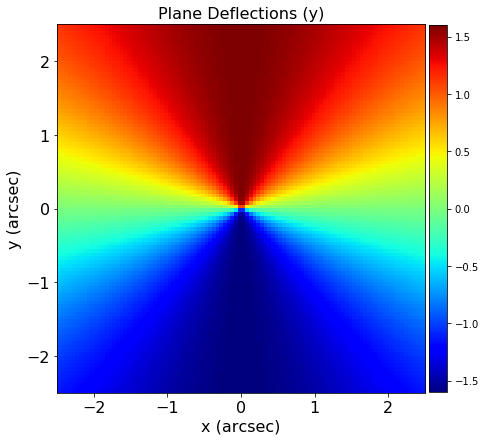

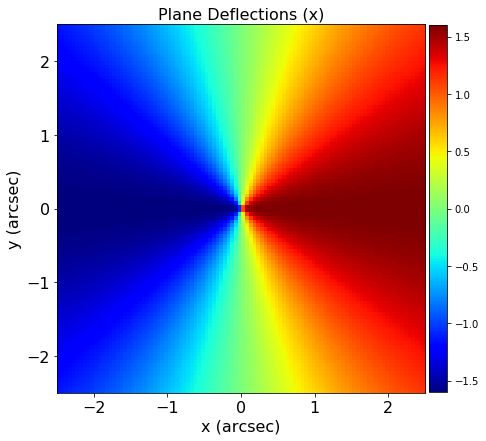

In [12]:
plane_plotters.plot_deflections_y(plane=image_plane)
plane_plotters.plot_deflections_x(plane=image_plane)

Throughout this chapter, we plotted lots of deflection angles. However, if you arn't familiar with strong lensing, you probably weren't entirely sure what they are actually used for. 

The deflection angles tell us how light is 'lensed' by a lens galaxy. By taking the image-plane coordinates and deflection angles, we can subtract the two to determine the source-plane's lensed coordinates, e.g.

source_plane_coordinates = image_plane_coordinates - image_plane_deflection_angles

Therefore, we can use our image_plane to 'trace' its grid-stack to the source-plane...

In [13]:
source_plane_grid_stack = image_plane.trace_grid_stack_to_next_plane()


... and use this grid-stack to setup the source-plane

In [15]:
source_plane = plane.Plane(galaxies=[source_galaxy], grid_stack=source_plane_grid_stack)

Lets inspect our regular grids - I bet our source-plane isn't the boring uniform grid we plotted in the first tutorial!

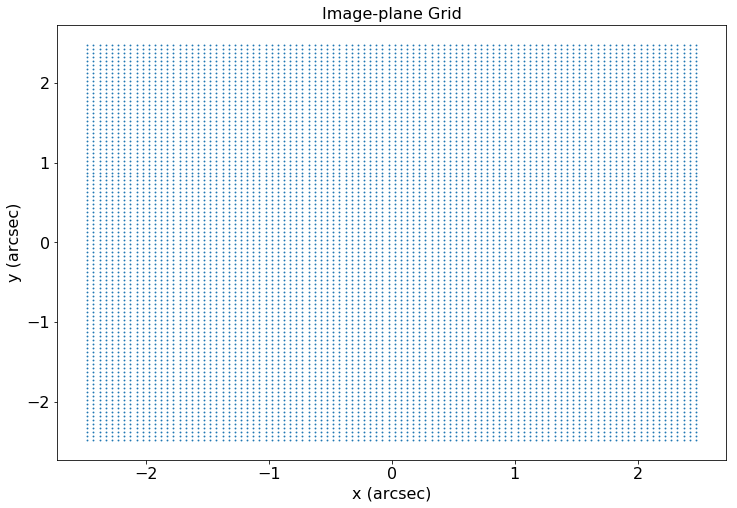

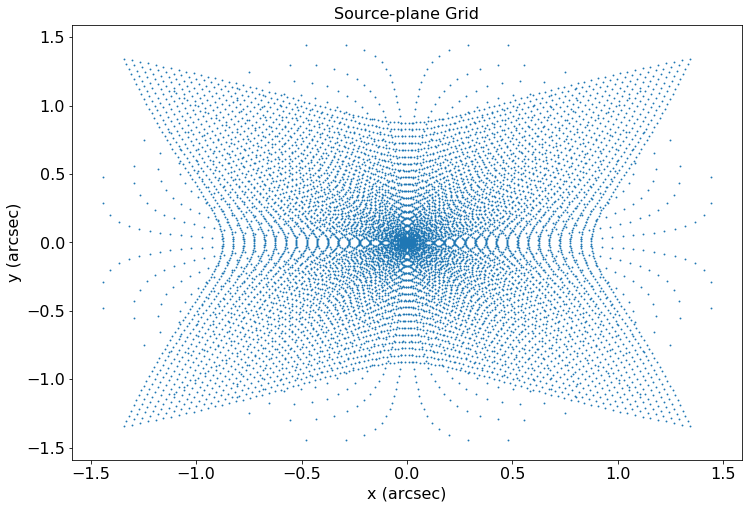

In [16]:
plane_plotters.plot_plane_grid(plane=image_plane, title='Image-plane Grid')
plane_plotters.plot_plane_grid(plane=source_plane, title='Source-plane Grid')

We can zoom in on the 'centre' of the source-plane (remembering the lens galaxy was centred at (0.1", 0.1")

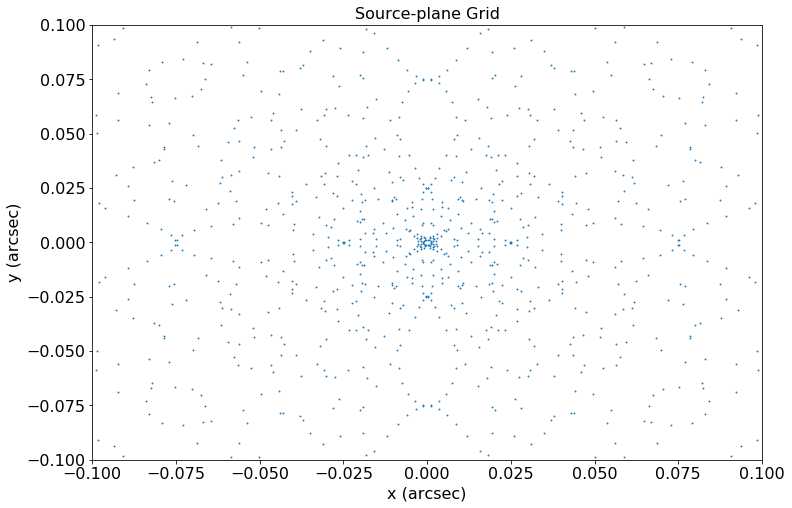

In [17]:
plane_plotters.plot_plane_grid(plane=source_plane, axis_limits=[-0.1, 0.1, -0.1, 0.1], title='Source-plane Grid')

We can also plot both planes next to one another, and highlight specific points on the grids. This means we can see how different image pixels map to the source-plane (and visa versa).

(We are inputting the pixel index's into 'points' - the first set of points go from 0 -> 50, which is the top row of the image-grid running from the left - as we said it would!)

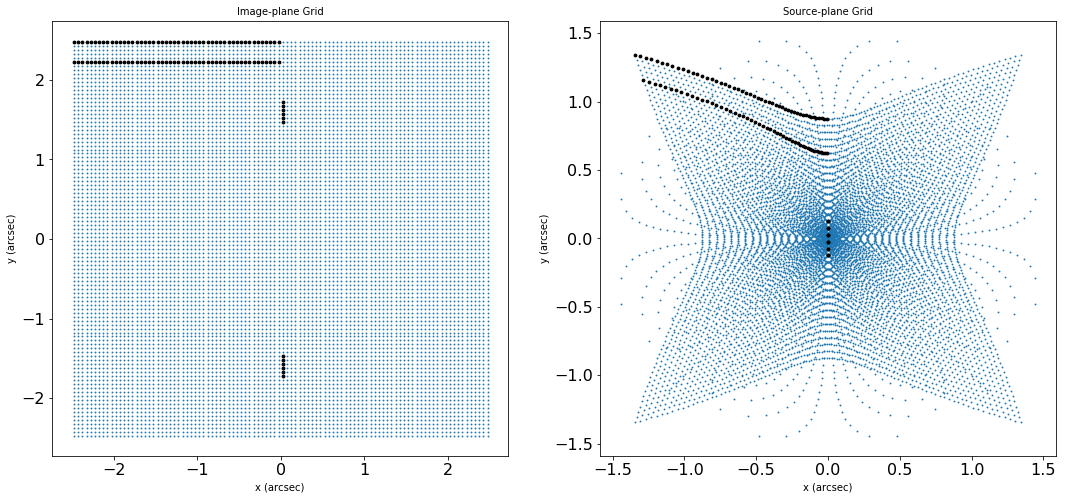

In [18]:
plane_plotters.plot_image_and_source_plane_subplot(image_plane=image_plane, source_plane=source_plane,
    points=[[range(0,50)], [range(500, 550)],
            [1550, 1650, 1750, 1850, 1950, 2050],
            [8450, 8350, 8250, 8150, 8050, 7950]])

Clearly, the source-plane's regular-grid is very different to the image-planes! It's not uniform and its centrainly not boring!

We can now ask the question - 'what does our source-galaxy look like in the image-plane'? That is, to us, the observer on Earth, how does the source-galaxy appear after lensing?. To do this, we simple trace the source galaxy's light 'back' from the source-plane grid-stack.

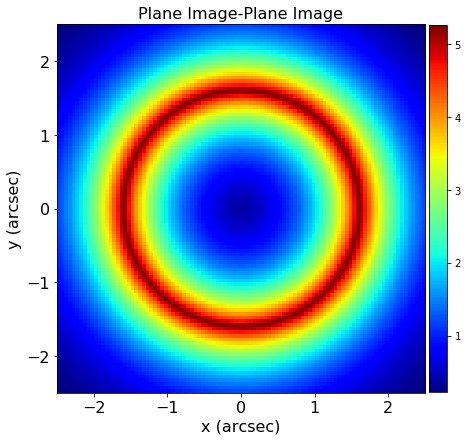

In [19]:
plane_plotters.plot_image_plane_image(plane=source_plane)

It's a rather spectacular ring of light, but why is it a ring? Well:

- Our lens galaxy was centred at (0.0", 0.0").
- Our source-galaxy was centred at (0.0", 0.0").
- Our lens galaxy had a spherical mass-profile.
- Our source-galaxy a spherical light-profile.

Given the perfect symmetry of the system, every path the source's light takes around the lens galaxy is radially identical. Thus, nothing else but a ring of light can form!

This is called an 'Einstein Ring' and its radius is called the 'Einstein Radius', which are both named after the man who famously used gravitational lensing to prove his theory of general relativity.

Finally, because we know our source-galaxy's light profile, we can also plot its 'plane-image'. This image is how the source intrinsically appears in the source-plane (e.g. without lensing). This is a useful thing to know, because the source-s light is highly magnified, meaning astronomers can study it in a lot more detail than would otherwise be possible!

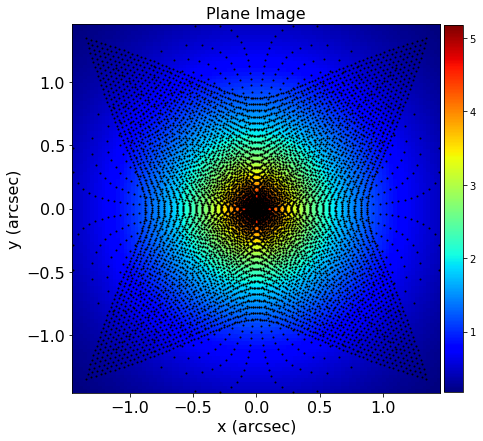

In [20]:
plane_plotters.plot_plane_image(plane=source_plane, plot_grid=True)

Plotting the grid over the plane image obscures its appearance, which isn't ideal. We can of course tell PyAutoLens not to plot the grid.

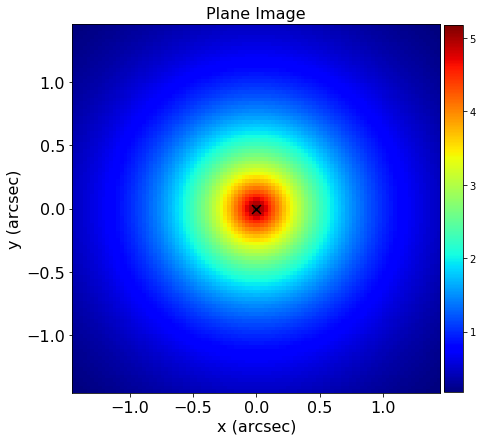

In [21]:
plane_plotters.plot_plane_image(plane=source_plane, plot_grid=False)

And, we're done. This is the first tutorial covering strong-lensing and I highly recommend you take a moment to really mess about with the code above to see what sort of lensed images you can form. Pay attention to the source-plane grid - its appearance can change a lot!

In particular, try:

1) Changing the lens galaxy's einstein radius - what happens to the source-plane's image-plane image?

2) Change the SphericalIsothermal mass-profile to an EllipticalIsothermal mass-profile and set its axis_ratio to 0.8. What happens to the number of source images?

3) As discussed at the beginning, planes can be composed of multiple galaxies. Make an the image-plane with two galaxies and see how multi-galaxy lensing leads to crazy source image-plane images. Also try making a source-plane with two galaxies!

Finally, if you are a newcomer to strong lensing, it might be worth reading briefly about some strong lensing theory. Don't worry about maths, and equations, and anything scary, but you should at least go to Wikipedia to figure out:

- What a critical line is.

- What a caustic is.

- What determines the image multiplicity of the lensed source.